### Introduction

Glassdoor Reviews:
Glassdoor produces reports based upon the data collected from its users, on topics including work–life balance, CEO pay ratios, lists of the best office places and cultures, and the accuracy of corporate job searching maxims. Data from Glassdoor has also been used by outside sources to produce estimates on the effects of salary trends and changes on corporate revenues. Glassdoor also puts the conclusions of its research of other companies towards its company policies. In 2015, Tom Lakin produced the first study of Glassdoor in the United Kingdom, concluding that Glassdoor is regarded by users as a more trustworthy source of information than career guides or official company documents.

Features:
The columns correspond to the date of the review, the job name, the job location, the status of the reviewers, and the reviews. Reviews are divided into sub-categories Career Opportunities, Comp & Benefits, Culture & Values, Senior Management, and Work/Life Balance. In addition, employees can add recommendations on the firm, the CEO, and the outlook.

Other information:
Ranking for the recommendation of the firm, CEO approval, and outlook are allocated categories v, r, x, and o, with the following meanings: v - Positive, r - Mild, x - Negative, o - No opinion

Data Dictionary:

1. rating: Overall Rating ranging from 1 to 5
2. title: Title of the Review
3. status: Working status of the reviewing Employee
4. pros: Positives of working at the Company
5. cons: Negatives of working at the Company
6. advice: Advice from the reviewer
7. Recommend: Reviewer's recommendation of the firm (v - Positive, r - Mild, x - Negative, o - No opinion)
8. CEO Approval: Reviewer's approval of the CEO (v - Positive, r - Mild, x - Negative, o - No opinion)
9. Business Outlook: Reviewer's outlook of the Business (v - Positive, r - Mild, x - Negative, o - No opinion)
10. Career Opportunities: Rating for the Career Opportunities at the Company ranging from 1 to 5
11. Compensation and Benefits: Rating for the Compensation and Benefits for the employees ranging from 1 to 5
12. Senior Management: Rating for the Senior Management at the Company ranging from 1 to 5
13. Work/Life Balance: Rating for the Work/Life Balance at the Company ranging from 1 to 5
14. Culture & Values: Rating for the Culture & Values of the Company ranging from 1 to 5
15. Diversity & Inclusion: Rating for the Diversity & Inclusion of the employees at the Company ranging from 1 to 5
16. firm_link: Glassdoor website link for the Company
17. date: Date of the Review (Mon dd, yyyy)
18. job: Designation of the Reviewer at the Company
19. index: Index of the rows


### Required Libraries

In [1]:
!pip install pycaret
!pip install pycaret[tuners]
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [2]:
from pycaret.classification import setup, compare_models, create_model, tune_model

In [3]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.5 MB/s eta 0:00:00


In [4]:
from catboost import CatBoostClassifier

In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, auc, roc_curve
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Reading Dataset

In [7]:
from google.colab import drive
drive.mount('/gdrive')
df = pd.read_csv('/gdrive/My Drive/Colab/glassdoor160.csv')
df.head()

Mounted at /gdrive


,Unnamed: 0,rating,title,status,pros,cons,advice,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion,firm_link,date,job,index
0,0,5.0,great work envrionment,"Former Temporary Employee, less than 1 year",good salary\ngreat co-workers and work environ...,none. seriously none. none. none.,NaN,v,o,o,NaN,NaN,NaN,5,NaN,NaN,Reviews/BAC-Florida-Bank-Reviews-E325091.htm,"Dec 18, 2020",Summer Intern,0.0
1,1,2.0,No growth,Former Employee,"Can't think of any pros, mostly negative but s...",Very cliquey mentality and tough to break into...,NaN,x,o,o,2.0,4.0,2.0,4,2.0,1.0,Reviews/BAC-Florida-Bank-Reviews-E325091.htm,"Aug 3, 2021",Anonymous Employee,1.0
2,2,4.0,Customer Service Representative,"Current Employee, more than 3 years",Great environment to work in,Big discrepancies between Workload/Responsibil...,NaN,x,r,r,1.0,2.0,3.0,2,4.0,1.0,Reviews/BAC-Florida-Bank-Reviews-E325091.htm,"Feb 16, 2021",Customer Service Representative,2.0
3,3,5.0,Great place,"Former Intern, less than 1 year","nice people, nice work environment",no cons at this company,NaN,v,v,v,5.0,5.0,5.0,5,5.0,NaN,Reviews/BAC-Florida-Bank-Reviews-E325091.htm,"Sep 13, 2020",Intern,3.0
4,4,5.0,Great company,"Former Employee, more than 8 years",Professional and dedicated team\r\nCollaborati...,"Just located in Miami, Florida",NaN,v,v,v,5.0,5.0,5.0,5,5.0,NaN,Reviews/BAC-Florida-Bank-Reviews-E325091.htm,"Aug 21, 2020",Specialist,4.0


In [8]:
df.shape

(161620, 20)

### Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161620 entries, 0 to 161619
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 161620 non-null  int64  
 1   rating                     161618 non-null  float64
 2   title                      160856 non-null  object 
 3   status                     161618 non-null  object 
 4   pros                       161618 non-null  object 
 5   cons                       161618 non-null  object 
 6   advice                     0 non-null       float64
 7   Recommend                  161618 non-null  object 
 8   CEO Approval               161618 non-null  object 
 9   Business Outlook           161618 non-null  object 
 10  Career Opportunities       135594 non-null  object 
 11  Compensation and Benefits  135204 non-null  object 
 12  Senior Management          134139 non-null  object 
 13  Work/Life Balance          13

In [10]:
# The columns 'Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance'
# are incorrectly having 'object' datatype

### Data Preprocessing

In [11]:
df.duplicated().sum() # No Duplicate Entries

0

### Noisy Value Treatment

In [12]:
obj = ['Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance']
for i in obj:
    print(df[i].value_counts())

Career Opportunities
5          27788
5.0        22500
4          19984
3          15266
4.0        11499
3.0        10447
1           7822
2.0         6803
1.0         6718
2           6266
10u0eun      211
e0wqkp       144
s4o194        73
156pzk5       73
Name: count, dtype: int64
Compensation and Benefits
5          27219
4          22894
5.0        19990
3          14311
4.0        13935
3.0         9517
1.0         7259
1           6729
2           6599
2.0         6005
10u0eun      304
s4o194       209
e0wqkp       193
156pzk5       40
Name: count, dtype: int64
Senior Management
5          22948
4          20698
5.0        14499
1          14133
3          12854
1.0        12267
3.0        10799
4.0        10593
2           7646
2.0         7324
10u0eun      121
e0wqkp       118
156pzk5       84
s4o194        55
Name: count, dtype: int64
Work/Life Balance
5          31267
4          20233
5.0        14665
3          14415
3.0        12651
4.0         9498
1.0         9254
1     

In [13]:
obj = ['Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance']
for i in obj:
    df[i].replace(to_replace=['5.0','4.0','3.0','2.0','1.0','10u0eun','e0wqkp', 's4o194', '156pzk5'],
                                value=['5','4','3','2','1', np.nan, np.nan, np.nan, np.nan], inplace = True)

### Datatype Conversion

In [14]:
# Few columns are having incorrect datatypes, we will convert them

In [15]:
obj = ['Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance']
for i in obj:
    df[i] = df[i].astype(float)

In [16]:
df.info() # Datatypes after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161620 entries, 0 to 161619
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 161620 non-null  int64  
 1   rating                     161618 non-null  float64
 2   title                      160856 non-null  object 
 3   status                     161618 non-null  object 
 4   pros                       161618 non-null  object 
 5   cons                       161618 non-null  object 
 6   advice                     0 non-null       float64
 7   Recommend                  161618 non-null  object 
 8   CEO Approval               161618 non-null  object 
 9   Business Outlook           161618 non-null  object 
 10  Career Opportunities       135093 non-null  float64
 11  Compensation and Benefits  134458 non-null  float64
 12  Senior Management          133761 non-null  float64
 13  Work/Life Balance          13

### Null Values

In [17]:
df.isnull().sum()

Unnamed: 0                        0
rating                            2
title                           764
status                            2
pros                              2
cons                              2
advice                       161620
Recommend                         2
CEO Approval                      2
Business Outlook                  2
Career Opportunities          26527
Compensation and Benefits     27162
Senior Management             27859
Work/Life Balance             27516
Culture & Values              30109
Diversity & Inclusion         68387
firm_link                         0
date                              2
job                               2
index                             0
dtype: int64

In [18]:
pd.DataFrame(df.isnull().sum()/len(df)*100) # Percentage of Null Values by Variables

,0
Unnamed: 0,0.000000
rating,0.001237
title,0.472714
status,0.001237
pros,0.001237
cons,0.001237
advice,100.000000
Recommend,0.001237
CEO Approval,0.001237
Business Outlook,0.001237


In [19]:
# We can drop the variables not useful for the analysis

In [20]:
df = df.drop(columns = ['Unnamed: 0','index','firm_link','date','job', 'advice'])

### Null Value Imputation

In [21]:
# We cannot impute the text columns, so we continue by imputing the Categorical and Numerical Columns

In [22]:
# Mode Imputation
df['rating'].fillna(df['rating'].mode()[0], inplace = True)
df['Recommend'].fillna(df['Recommend'].mode()[0], inplace = True)
df['CEO Approval'].fillna(df['CEO Approval'].mode()[0], inplace = True)
df['Business Outlook'].fillna(df['Business Outlook'].mode()[0], inplace = True)
df['status'].fillna(df['status'].mode()[0], inplace = True)

# Logical Imputation
df['Career Opportunities'] = df.groupby('rating')['Career Opportunities'].transform(lambda x: x.fillna(x.mode()[0]))
df['Compensation and Benefits'] = df.groupby('rating')['Compensation and Benefits'].transform(lambda x: x.fillna(x.mode()[0]))
df['Senior Management'] = df.groupby('rating')['Senior Management'].transform(lambda x: x.fillna(x.mode()[0]))
df['Work/Life Balance'] = df.groupby('rating')['Work/Life Balance'].transform(lambda x: x.fillna(x.mode()[0]))
df['Culture & Values'] = df.groupby('rating')['Culture & Values'].transform(lambda x: x.fillna(x.mode()[0]))
df['Diversity & Inclusion'] = df.groupby('rating')['Diversity & Inclusion'].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
df.isnull().sum()/len(df)*100 # Null Values after imputation

rating                       0.000000
title                        0.472714
status                       0.000000
pros                         0.001237
cons                         0.001237
Recommend                    0.000000
CEO Approval                 0.000000
Business Outlook             0.000000
Career Opportunities         0.000000
Compensation and Benefits    0.000000
Senior Management            0.000000
Work/Life Balance            0.000000
Culture & Values             0.000000
Diversity & Inclusion        0.000000
dtype: float64

### Duplicate Values after Null value Imputation

In [24]:
df.duplicated().sum()

51719

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.head() # Clean Data

,rating,title,status,pros,cons,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion
0,5.0,great work envrionment,"Former Temporary Employee, less than 1 year",good salary\ngreat co-workers and work environ...,none. seriously none. none. none.,v,o,o,5.0,5.0,5.0,5.0,5.0,5.0
1,2.0,No growth,Former Employee,"Can't think of any pros, mostly negative but s...",Very cliquey mentality and tough to break into...,x,o,o,2.0,4.0,2.0,4.0,2.0,1.0
2,4.0,Customer Service Representative,"Current Employee, more than 3 years",Great environment to work in,Big discrepancies between Workload/Responsibil...,x,r,r,1.0,2.0,3.0,2.0,4.0,1.0
3,5.0,Great place,"Former Intern, less than 1 year","nice people, nice work environment",no cons at this company,v,v,v,5.0,5.0,5.0,5.0,5.0,5.0
4,5.0,Great company,"Former Employee, more than 8 years",Professional and dedicated team\r\nCollaborati...,"Just located in Miami, Florida",v,v,v,5.0,5.0,5.0,5.0,5.0,5.0


## Exploratory Data Analysis

### Descriptive Statistics

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,109901.0,3.717873,1.192677,1.0,3.0,4.0,5.0,5.0
Career Opportunities,109901.0,3.659985,1.241298,1.0,3.0,4.0,5.0,5.0
Compensation and Benefits,109901.0,3.643870,1.180438,1.0,3.0,4.0,5.0,5.0
Senior Management,109901.0,3.376548,1.359509,1.0,2.0,4.0,5.0,5.0
Work/Life Balance,109901.0,3.584171,1.288575,1.0,3.0,4.0,5.0,5.0
Culture & Values,109901.0,3.647947,1.298651,1.0,3.0,4.0,5.0,5.0
Diversity & Inclusion,109901.0,3.964568,1.128601,1.0,4.0,4.0,5.0,5.0


In [28]:
df.describe(exclude = 'number').T

,count,unique,top,freq
title,109153,59727,Good,3050
status,109901,18,Current Employee,26515
pros,109900,107224,Work life balance is good,138
cons,109900,107748,None that I can think of,127
Recommend,109901,3,v,52753
CEO Approval,109901,4,o,42050
Business Outlook,109901,4,v,42114


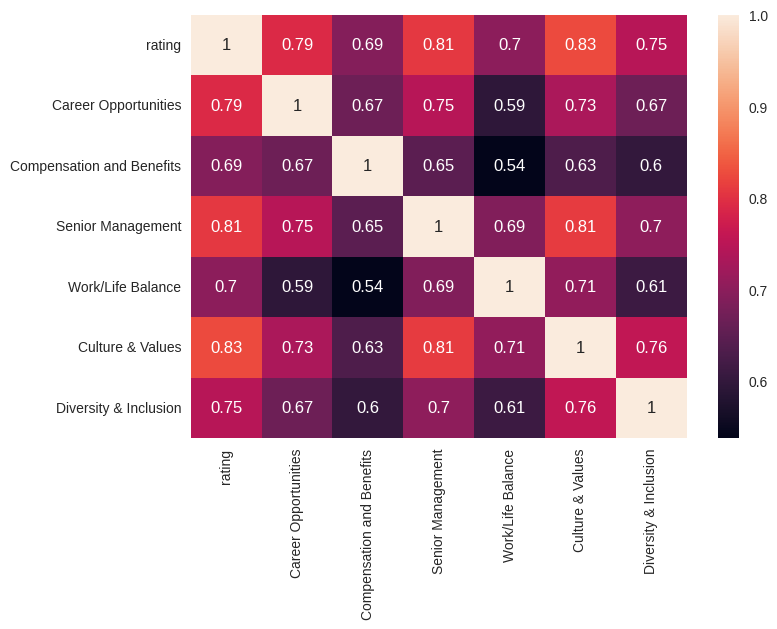

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot= True)
plt.show()

In [30]:
# The numerical variables are highly correlated

In [31]:
pd.DataFrame(df.select_dtypes(include='number').skew())

,0
rating,-0.740469
Career Opportunities,-0.665318
Compensation and Benefits,-0.603869
Senior Management,-0.448174
Work/Life Balance,-0.613364
Culture & Values,-0.684031
Diversity & Inclusion,-1.233823


### Univariate Analysis

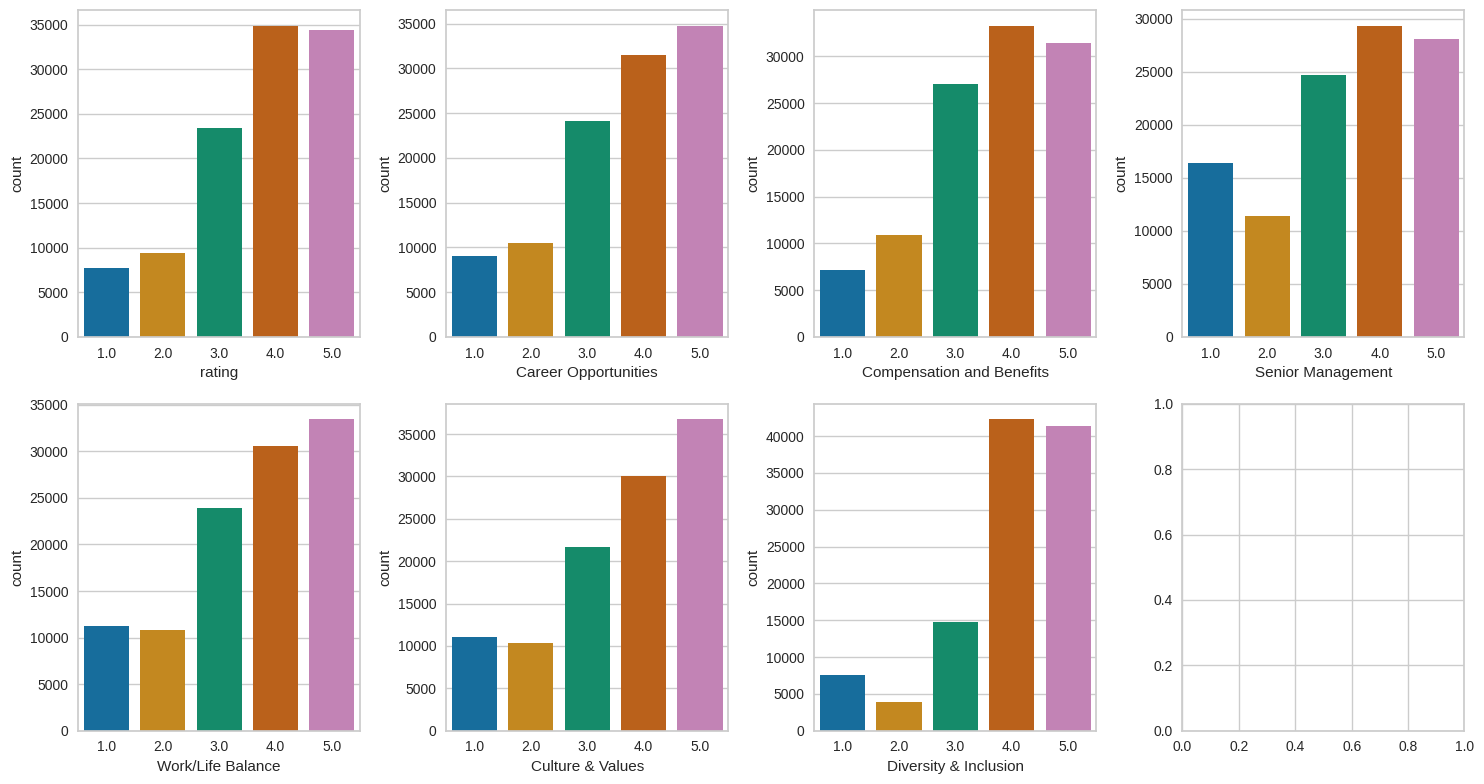

In [32]:
cols = ['rating', 'Career Opportunities','Compensation and Benefits', 'Senior Management',
        'Work/Life Balance', 'Culture & Values', 'Diversity & Inclusion']
fig, ax = plt.subplots(2,4, figsize=(15,8))
for i, subplot in zip(cols, ax.flatten()):
    vc = df[i].value_counts()
    sns.barplot(x = vc.index, y = vc, palette = 'colorblind', ax=subplot)
plt.tight_layout()
plt.show()

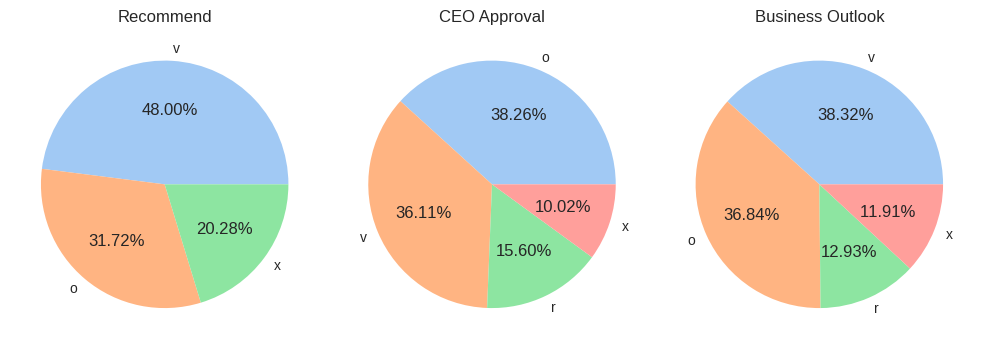

In [33]:
cols = ['Recommend','CEO Approval', 'Business Outlook']
fig, ax = plt.subplots(1,3, figsize=(10,5))
i = 0
for j in cols:
    plt.title(j)
    vc = df[j].value_counts()
    ax[i].pie(x = vc, labels = vc.index, autopct= "%0.2f%%", colors= sns.color_palette('pastel'))
    ax[i].set_title(j)
    i += 1
plt.tight_layout()
plt.show()

In [34]:
sc = df['status'].value_counts()
sc

status
Current Employee                               26515
Former Employee                                13917
Current Employee, less than 1 year             12486
Current Employee, more than 1 year             12086
Current Employee, more than 3 years             8459
Former Employee, more than 1 year               7000
Current Employee, more than 5 years             5604
Former Employee, more than 3 years              4791
Former Employee, less than 1 year               4322
Current Employee, more than 10 years            3960
Current Employee, more than 8 years             3260
Former Employee, more than 5 years              3113
Former Employee, more than 10 years             2571
Former Employee, more than 8 years              1813
Former Temporary Employee, less than 1 year        1
Current Intern, less than 1 year                   1
Former Intern, less than 1 year                    1
Former Intern                                      1
Name: count, dtype: int64

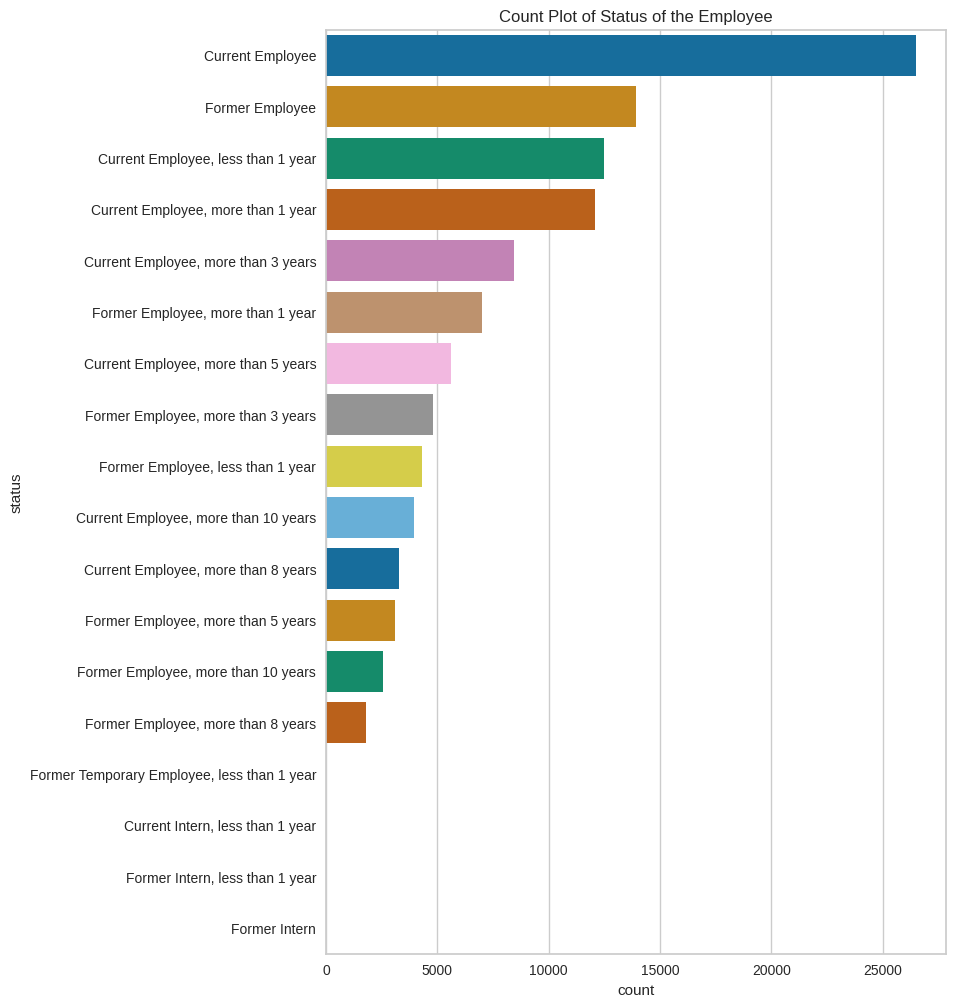

In [35]:

plt.figure(figsize=(8,12))
sns.barplot(y = sc.index, x = sc, palette = 'colorblind')
plt.title('Count Plot of Status of the Employee')
plt.show()

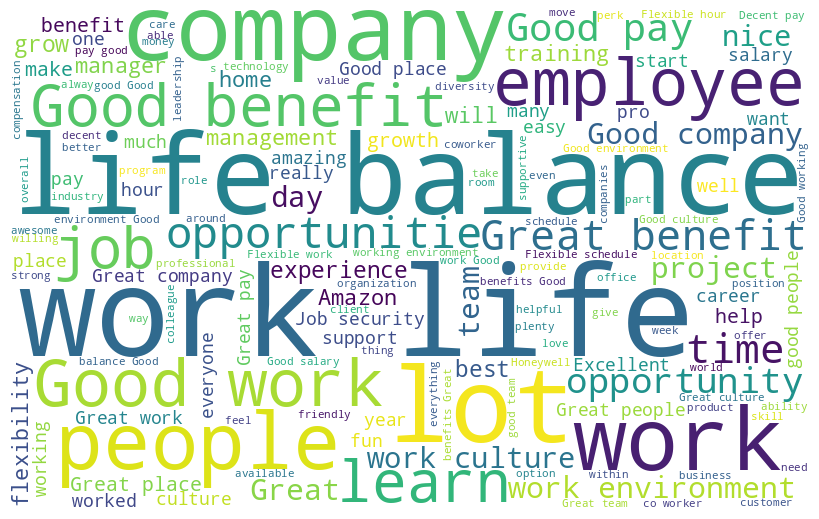

In [36]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df['pros'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

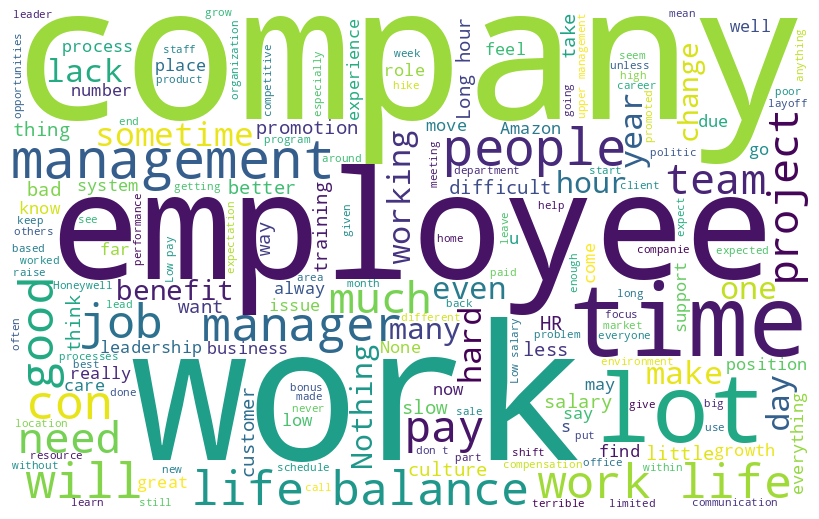

In [37]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df['cons'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Feature Engineering

In [38]:
def sentiment_func(a):
    if a < 4:
        return 'Negative'
    if a > 3:
        return 'Positive'
    else:
        return np.nan

In [39]:
df['Sentiment'] = df['rating'].apply(sentiment_func)

In [40]:
df_meta = df.drop(columns = ['rating', 'pros', 'cons','title'])

In [41]:
df_meta.head()

,status,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion,Sentiment
0,"Former Temporary Employee, less than 1 year",v,o,o,5.0,5.0,5.0,5.0,5.0,5.0,Positive
1,Former Employee,x,o,o,2.0,4.0,2.0,4.0,2.0,1.0,Negative
2,"Current Employee, more than 3 years",x,r,r,1.0,2.0,3.0,2.0,4.0,1.0,Positive
3,"Former Intern, less than 1 year",v,v,v,5.0,5.0,5.0,5.0,5.0,5.0,Positive
4,"Former Employee, more than 8 years",v,v,v,5.0,5.0,5.0,5.0,5.0,5.0,Positive


In [42]:
df_meta.duplicated().sum()

57506

In [43]:
df_meta.drop_duplicates(inplace= True)

### Classification Base Model

In [44]:
# We will not use the text and date columns for the classification analysis
# Independent and Target Variable
x = df_meta.drop(columns = 'Sentiment')
y = df_meta['Sentiment']

### Encoding

In [45]:
x = pd.get_dummies(x, drop_first= True, dtype= int)
x.head()

,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion,"status_Current Employee, less than 1 year","status_Current Employee, more than 1 year","status_Current Employee, more than 10 years","status_Current Employee, more than 3 years",...,"status_Former Intern, less than 1 year","status_Former Temporary Employee, less than 1 year",Recommend_v,Recommend_x,CEO Approval_r,CEO Approval_v,CEO Approval_x,Business Outlook_r,Business Outlook_v,Business Outlook_x
0,5.0,5.0,5.0,5.0,5.0,5.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,2.0,4.0,2.0,4.0,2.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,2.0,3.0,2.0,4.0,1.0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
3,5.0,5.0,5.0,5.0,5.0,5.0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,5.0,5.0,5.0,5.0,5.0,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [46]:
x.shape

(52395, 31)

In [47]:
y.value_counts()

Sentiment
Negative    27779
Positive    24616
Name: count, dtype: int64

### Train Test Split

In [48]:
xtrain ,xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, stratify= y, random_state= 7)

### Classification Base Model

#### Fitting Model

In [49]:
gb = GradientBoostingClassifier()
model = gb.fit(xtrain, ytrain)

#### Predictions

In [50]:
ytestpred = model.predict(xtest)
ytrainpred = model.predict(xtrain)
y_prob = model.predict_proba(xtest)[:, 1]

#### Confusion Matrix

In [51]:
cm = confusion_matrix(ytest, ytestpred)
cm

array([[4610,  946],
       [ 803, 4120]])

<Axes: >

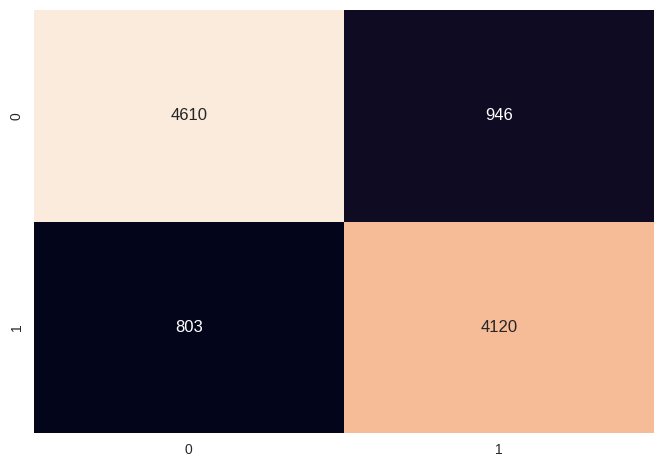

In [52]:
sns.heatmap(cm, annot=True, cbar= False, fmt='g')

#### Classification Report

In [53]:
print('Test Data Classification Report\n', classification_report(ytest, ytestpred))
print('Train Data Classification Report\n',classification_report(ytrain, ytrainpred))

Test Data Classification Report
               precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      5556
    Positive       0.81      0.84      0.82      4923

    accuracy                           0.83     10479
   macro avg       0.83      0.83      0.83     10479
weighted avg       0.83      0.83      0.83     10479

Train Data Classification Report
               precision    recall  f1-score   support

    Negative       0.86      0.84      0.85     22223
    Positive       0.82      0.84      0.83     19693

    accuracy                           0.84     41916
   macro avg       0.84      0.84      0.84     41916
weighted avg       0.84      0.84      0.84     41916



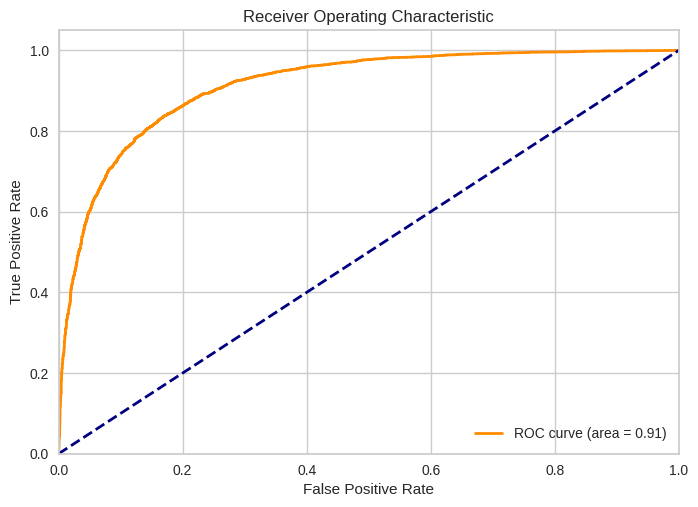

In [54]:
fpr, tpr, thresholds = roc_curve(ytest, y_prob, pos_label = 'Positive')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
exp_lead_scoring = setup(data=df_meta, target = 'Sentiment',
                   fold_shuffle=True,
                   session_id = 42,
                   normalize = False,
                   transformation = False,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   verbose=True)

,Description,Value
0,Session id,42
1,Target,Sentiment
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(52395, 11)"
5,Transformed data shape,"(52395, 35)"
6,Transformed train set shape,"(36676, 35)"
7,Transformed test set shape,"(15719, 35)"
8,Numeric features,6
9,Categorical features,4


In [56]:
best_model = compare_models(fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8353,0.9142,0.8353,0.8356,0.8354,0.6698,0.6699,3.1833
ada,Ada Boost Classifier,0.8352,0.9129,0.8352,0.8357,0.8353,0.6696,0.6699,1.6500
lr,Logistic Regression,0.8347,0.9126,0.8347,0.8356,0.8348,0.6689,0.6694,3.0067
lightgbm,Light Gradient Boosting Machine,0.8342,0.9129,0.8342,0.8343,0.8342,0.6673,0.6674,1.2433
catboost,CatBoost Classifier,0.8317,0.9112,0.8317,0.8319,0.8317,0.6624,0.6625,9.8233
ridge,Ridge Classifier,0.8290,0.9110,0.8290,0.8328,0.8291,0.6586,0.6615,1.0167
lda,Linear Discriminant Analysis,0.8290,0.9110,0.8290,0.8328,0.8291,0.6586,0.6615,0.7067
xgboost,Extreme Gradient Boosting,0.8260,0.9048,0.8260,0.8262,0.8260,0.6510,0.6510,1.0367
svm,SVM - Linear Kernel,0.8252,0.9108,0.8252,0.8291,0.8239,0.6469,0.6519,0.8700
rf,Random Forest Classifier,0.8115,0.8909,0.8115,0.8115,0.8115,0.6216,0.6217,3.0700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [57]:
# Highest Scores are achieved by Gradient Boosting Classifier

In [58]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8378,0.9202,0.8378,0.8382,0.8379,0.6749,0.6750
1,0.8441,0.9209,0.8441,0.8448,0.8442,0.6876,0.6880
2,0.8212,0.9077,0.8212,0.8212,0.8212,0.6411,0.6411
3,0.8362,0.9133,0.8362,0.8365,0.8362,0.6715,0.6716
4,0.8312,0.9140,0.8312,0.8313,0.8313,0.6614,0.6614
5,0.8391,0.9150,0.8391,0.8397,0.8393,0.6777,0.6780
6,0.8312,0.9144,0.8312,0.8313,0.8312,0.6613,0.6613
7,0.8555,0.9292,0.8555,0.8556,0.8555,0.7101,0.7101
8,0.8255,0.9050,0.8255,0.8267,0.8256,0.6507,0.6514


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
tuned_lr_optuna,tuner_1 = tune_model(gbc,
                                   search_library = 'optuna',
                                   fold = 5,
                                   optimize = 'auc',
                                   choose_better = True,
                                   return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8376,0.9176,0.8376,0.8380,0.8377,0.6746,0.6747
1,0.8286,0.9097,0.8286,0.8287,0.8287,0.6561,0.6561
2,0.8316,0.9125,0.8316,0.8318,0.8317,0.6623,0.6623
3,0.8398,0.9192,0.8398,0.8398,0.8398,0.6784,0.6784
4,0.8275,0.9029,0.8275,0.8284,0.8277,0.6546,0.6551
Mean,0.8331,0.9124,0.8331,0.8333,0.8331,0.6652,0.6653
Std,0.0049,0.0058,0.0049,0.0047,0.0048,0.0096,0.0096


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn:Searching the best hyperparameters using 36676 samples...
INFO:optuna_integration.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
print(tuned_lr_optuna)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


<Axes: >

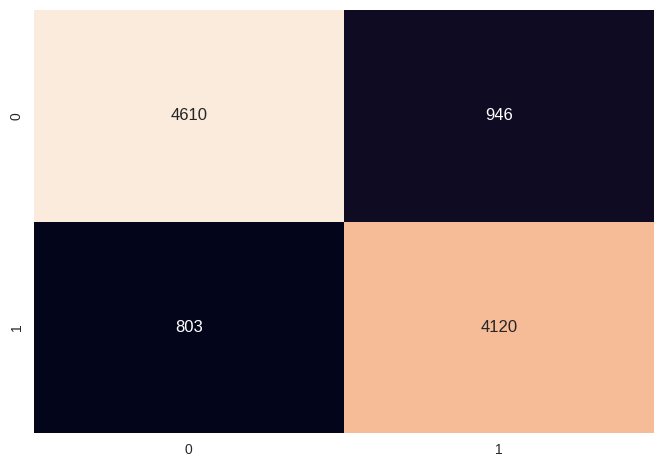

In [61]:
gb =  tuned_lr_optuna
model2 = gb.fit(xtrain, ytrain)
ypred2 = model2.predict(xtest)
sns.heatmap(confusion_matrix(ytest, ypred2), annot=True, cbar= False, fmt='g')

In [62]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      5556
    Positive       0.81      0.84      0.82      4923

    accuracy                           0.83     10479
   macro avg       0.83      0.83      0.83     10479
weighted avg       0.83      0.83      0.83     10479



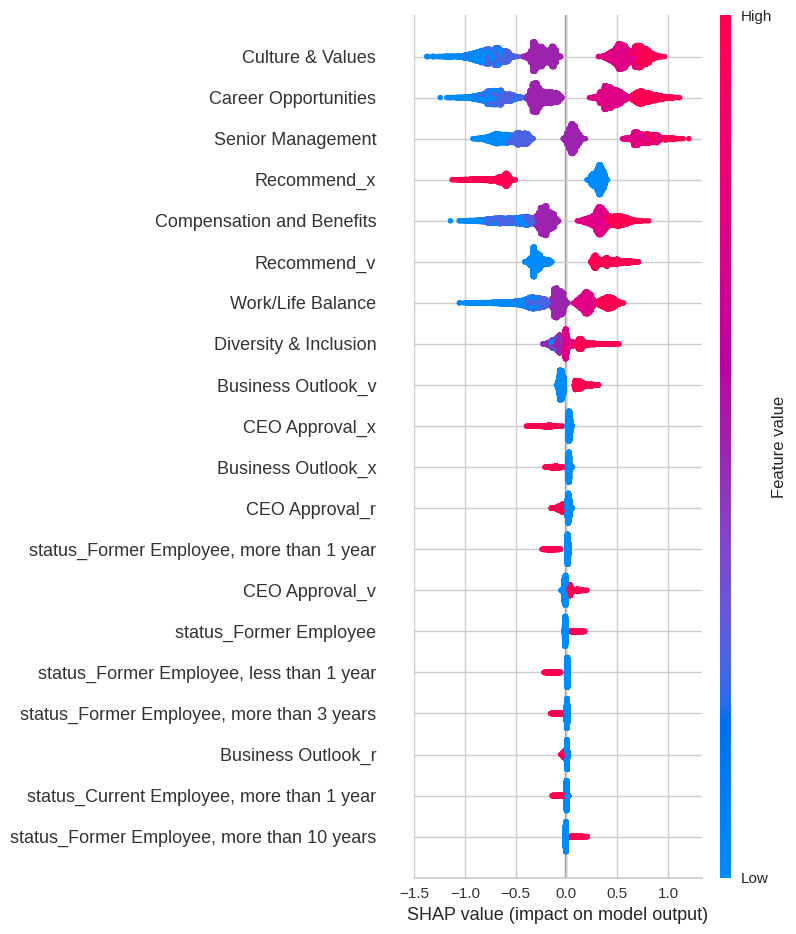

In [107]:
import shap

explainer = shap.Explainer(tuned_lr_optuna)
shap_values = explainer(xtest)

# Summary plot of SHAP values
shap.summary_plot(shap_values, xtest)

In [63]:
# Catboost Classifier

In [64]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize CatBoostClassifier with class weights
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    class_weights=class_weights_dict,
    random_seed=42,
    logging_level='Verbose'
)

# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, cat_features=[x.columns.get_loc(col) for col in x.select_dtypes(include=['object']).columns])

# Predict on the test set
y_pred = model.predict(X_test)

# Decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8258183	test: 0.8250978	best: 0.8250978 (0)	total: 58.1ms	remaining: 58s
1:	learn: 0.8309800	test: 0.8327211	best: 0.8327211 (1)	total: 68.9ms	remaining: 34.4s
2:	learn: 0.8306622	test: 0.8346745	best: 0.8346745 (2)	total: 82.3ms	remaining: 27.3s
3:	learn: 0.8337756	test: 0.8343191	best: 0.8346745 (2)	total: 93.7ms	remaining: 23.3s
4:	learn: 0.8342511	test: 0.8345870	best: 0.8346745 (2)	total: 104ms	remaining: 20.7s
5:	learn: 0.8336539	test: 0.8341163	best: 0.8346745 (2)	total: 114ms	remaining: 18.9s
6:	learn: 0.8344417	test: 0.8358072	best: 0.8358072 (6)	total: 130ms	remaining: 18.4s
7:	learn: 0.8347104	test: 0.8358920	best: 0.8358920 (7)	total: 142ms	remaining: 17.5s
8:	learn: 0.8357786	test: 0.8366134	best: 0.8366134 (8)	total: 152ms	remaining: 16.7s
9:	learn: 0.8369144	test: 0.8372583	best: 0.8372583 (9)	total: 163ms	remaining: 16.2s
10:	learn: 0.8374033	test: 0.8374588	best: 0.8374588 (10)	total: 173ms	remaining: 15.6s
11:	learn: 0.8373854	test: 0.8381599	best: 0.83815

In [65]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred_decoded)}")
print(classification_report(y_test_decoded, y_pred_decoded))
print(confusion_matrix(y_test_decoded, y_pred_decoded))

Accuracy: 0.8376753507014028
              precision    recall  f1-score   support

    Negative       0.86      0.83      0.84      5556
    Positive       0.81      0.85      0.83      4923

    accuracy                           0.84     10479
   macro avg       0.84      0.84      0.84     10479
weighted avg       0.84      0.84      0.84     10479

[[4584  972]
 [ 729 4194]]


There is no significant change in the results after using Catboost Classifier.

## Natural Language Processing

In [66]:
df['text'] = df['pros'] + ' ' + df['cons']

In [67]:
df_text = df[['text','Sentiment']]
df_text.head()

,text,Sentiment
0,good salary\ngreat co-workers and work environ...,Positive
1,"Can't think of any pros, mostly negative but s...",Negative
2,Great environment to work in Big discrepancies...,Positive
3,"nice people, nice work environment no cons at ...",Positive
4,Professional and dedicated team\r\nCollaborati...,Positive


In [68]:
df_text.isnull().sum()

text         1
Sentiment    0
dtype: int64

In [69]:
df_text.dropna(inplace= True) # 1 null values, so we can drop it

In [70]:
df_text.duplicated().sum()

17

In [71]:
df_text.drop_duplicates(inplace= True)

In [72]:
df_text.reset_index(inplace= True)
df_text.drop(columns = 'index', inplace= True)

In [73]:
df_text['Sentiment'].value_counts()

Sentiment
Positive    69318
Negative    40565
Name: count, dtype: int64

In [74]:
import sys
!{sys.executable} -m pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 16.6 MB/s eta 0:00:00


### Text preprocessing

In [75]:
stop_words = set(stopwords.words('english'))
neg_list = ['no','not','can', 'couldn', "couldn't","unable",'don',"don't",'won',"won't", 'wouldn', "wouldn't"]
custom_stop_words = set(stop_words) - set(neg_list)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word.isalnum() and word not in custom_stop_words]
    return ' '.join(text)

df_text['clean_text'] = df_text['text'].apply(preprocess_text)

In [76]:
df_text.head()

,text,Sentiment,clean_text
0,good salary\ngreat co-workers and work environ...,Positive,good salary great coworkers work environment n...
1,"Can't think of any pros, mostly negative but s...",Negative,can not think pro mostly negative people nice ...
2,Great environment to work in Big discrepancies...,Positive,great environment work big discrepancy workloa...
3,"nice people, nice work environment no cons at ...",Positive,nice people nice work environment no con company
4,Professional and dedicated team\r\nCollaborati...,Positive,professional dedicated team collaborative cult...


### TF IDF Method

In [77]:
# Extracting top 500 words

In [78]:
tfidf_vectorizer = TfidfVectorizer(max_features= 500)
tfidf_features = tfidf_vectorizer.fit_transform(df_text['clean_text'])

### Train Test Split

In [79]:
xtraint, xtestt, ytraint, ytestt = train_test_split(tfidf_features, df_text['Sentiment'], test_size=0.2, stratify=df_text['Sentiment'], random_state=7)

### NLP Base Model

#### Fitting Model

In [80]:
lrt = LogisticRegression(class_weight= 'balanced')
modelt = lrt.fit(xtraint, ytraint)

#### Predictions

In [81]:
ypredt = modelt.predict(xtestt)

#### Confusion Matrix

In [82]:
cmt = confusion_matrix(ytestt, ypredt)
cmt

array([[ 5792,  2321],
       [ 3701, 10163]])

<Axes: >

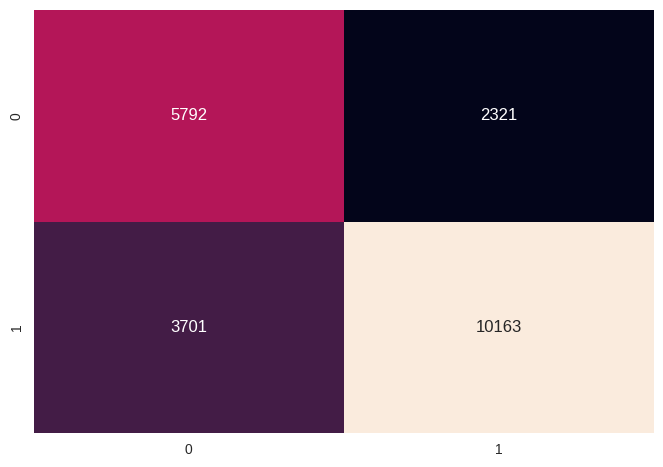

In [83]:
sns.heatmap(cmt, annot=True, cbar= False, fmt='g')

#### Classification Report

In [84]:
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.61      0.71      0.66      8113
    Positive       0.81      0.73      0.77     13864

    accuracy                           0.73     21977
   macro avg       0.71      0.72      0.71     21977
weighted avg       0.74      0.73      0.73     21977



In [85]:
knn = KNeighborsClassifier()
modelt = knn.fit(xtraint, ytraint)
ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.51      0.28      0.36      8113
    Positive       0.67      0.84      0.74     13864

    accuracy                           0.63     21977
   macro avg       0.59      0.56      0.55     21977
weighted avg       0.61      0.63      0.60     21977



In [86]:
DT = DecisionTreeClassifier(class_weight= 'balanced')
modelt = DT.fit(xtraint, ytraint)
ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.51      0.53      0.52      8113
    Positive       0.72      0.70      0.71     13864

    accuracy                           0.64     21977
   macro avg       0.61      0.62      0.61     21977
weighted avg       0.64      0.64      0.64     21977



In [87]:
rf = RandomForestClassifier()
modelt = rf.fit(xtraint, ytraint)
ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.71      0.50      0.59      8113
    Positive       0.75      0.88      0.81     13864

    accuracy                           0.74     21977
   macro avg       0.73      0.69      0.70     21977
weighted avg       0.73      0.74      0.73     21977



In [88]:
ada = AdaBoostClassifier()
modelt = ada.fit(xtraint, ytraint)
ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.70      0.46      0.56      8113
    Positive       0.74      0.88      0.80     13864

    accuracy                           0.73     21977
   macro avg       0.72      0.67      0.68     21977
weighted avg       0.72      0.73      0.71     21977



In [89]:
gb = GradientBoostingClassifier()
modelt = gb.fit(xtraint, ytraint)
ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

    Negative       0.76      0.38      0.51      8113
    Positive       0.72      0.93      0.81     13864

    accuracy                           0.73     21977
   macro avg       0.74      0.65      0.66     21977
weighted avg       0.73      0.73      0.70     21977



The recall for Negative is highest for Logistic Regression

### Word2Vec Method

In [90]:
import contractions

In [91]:
stop_words = set(stopwords.words('english'))
neg_list = ['no','not','can', 'couldn', "couldn't","unable",'don',"don't",'won',"won't", 'wouldn', "wouldn't"]
custom_stop_words = set(stop_words) - set(neg_list)

def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalnum() and word not in custom_stop_words]  # Remove stopwords and special characters
    return tokens

df_text['tokens'] = df_text['text'].apply(preprocess_text)

word2vec_model = Word2Vec(sentences=df_text['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Create feature vectors
df_text['vector'] = df_text['tokens'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# Prepare data for classification
X = np.vstack(df_text['vector'])
y = df_text['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(class_weight= 'balanced')
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7084679437593848
              precision    recall  f1-score   support

    Negative       0.59      0.73      0.65      8145
    Positive       0.81      0.69      0.75     13832

    accuracy                           0.71     21977
   macro avg       0.70      0.71      0.70     21977
weighted avg       0.73      0.71      0.71     21977



In [92]:
df_text.shape

(109883, 5)

In [93]:
Xdf = pd.DataFrame(X)
Xdf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.078151,1.083484,0.434452,-0.736716,0.593330,-0.482743,0.056139,0.983250,-0.799688,-0.193175,...,0.872348,-0.406585,0.401248,-0.695849,0.836256,0.173058,0.269537,0.110008,0.004303,-0.911130
1,-0.374406,0.465166,-0.252255,0.407649,0.356965,-0.735517,0.084475,0.638019,-0.744026,-0.218405,...,0.173375,0.083005,0.277609,0.074129,0.895972,0.382854,0.418303,-0.029038,0.254117,-0.540493
2,-0.047723,-0.011266,0.154296,-0.180925,0.222458,-0.759397,0.112215,0.344578,-0.412597,0.486527,...,0.315815,-0.085442,0.153909,-0.046220,0.413514,-0.462471,0.514551,-0.016363,0.012175,-0.117871
3,-0.273312,0.991986,0.487698,-0.056628,0.868631,-0.899897,0.544392,0.373942,-0.484280,-0.411939,...,0.759961,-0.401843,0.575547,-0.533544,1.650552,0.875839,1.206965,-0.023240,0.296001,-1.101846
4,-0.067419,0.558549,-0.612020,-0.205865,0.541291,-0.508749,0.500632,0.818936,-1.097545,-0.414270,...,0.950178,0.007077,0.178720,-0.205347,1.043340,0.077999,0.307702,1.063024,-0.050643,-0.650323


In [94]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [95]:
df_text.shape

(109883, 5)

In [96]:
analyzer = SentimentIntensityAnalyzer()
def sent_text(text):
  sentiment = analyzer.polarity_scores(text)
  sentiment = sentiment['compound']
  return sentiment
Xdf[100] = df_text['clean_text'].apply(sent_text)

In [97]:
X = Xdf
y = df_text['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(class_weight= 'balanced')
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7217090594712654
              precision    recall  f1-score   support

    Negative       0.60      0.72      0.66      8145
    Positive       0.82      0.72      0.77     13832

    accuracy                           0.72     21977
   macro avg       0.71      0.72      0.71     21977
weighted avg       0.74      0.72      0.73     21977



In [98]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

In [100]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize CatBoostClassifier with class weights
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    class_weights=class_weights_dict,
    random_seed=42,
    logging_level='Verbose'
)

# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, cat_features=[x.columns.get_loc(col) for col in x.select_dtypes(include=['object']).columns])

# Predict on the test set
y_pred = model.predict(X_test)

# Decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6714709	test: 0.6662164	best: 0.6662164 (0)	total: 219ms	remaining: 3m 39s
1:	learn: 0.6934803	test: 0.6898028	best: 0.6898028 (1)	total: 396ms	remaining: 3m 17s
2:	learn: 0.6933309	test: 0.6909602	best: 0.6909602 (2)	total: 561ms	remaining: 3m 6s
3:	learn: 0.6940939	test: 0.6931692	best: 0.6931692 (3)	total: 724ms	remaining: 3m
4:	learn: 0.6966047	test: 0.6938396	best: 0.6938396 (4)	total: 912ms	remaining: 3m 1s
5:	learn: 0.6997099	test: 0.6967247	best: 0.6967247 (5)	total: 1.09s	remaining: 3m
6:	learn: 0.7009833	test: 0.6975878	best: 0.6975878 (6)	total: 1.29s	remaining: 3m 2s
7:	learn: 0.7023448	test: 0.7009834	best: 0.7009834 (7)	total: 1.42s	remaining: 2m 56s
8:	learn: 0.7029815	test: 0.7005604	best: 0.7009834 (7)	total: 1.59s	remaining: 2m 54s
9:	learn: 0.7050637	test: 0.7020350	best: 0.7020350 (9)	total: 1.72s	remaining: 2m 50s
10:	learn: 0.7062892	test: 0.7028515	best: 0.7028515 (10)	total: 1.88s	remaining: 2m 48s
11:	learn: 0.7069155	test: 0.7045653	best: 0.7045653

In [101]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7046457660281203
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      8113
           1       0.76      0.78      0.77     13864

    accuracy                           0.70     21977
   macro avg       0.68      0.68      0.68     21977
weighted avg       0.70      0.70      0.70     21977



In [102]:
classifier = DecisionTreeClassifier(class_weight= 'balanced')
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6461755471629431
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      8113
           1       0.72      0.72      0.72     13864

    accuracy                           0.65     21977
   macro avg       0.62      0.62      0.62     21977
weighted avg       0.65      0.65      0.65     21977



In [103]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7288983937753105
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      8113
           1       0.75      0.86      0.80     13864

    accuracy                           0.73     21977
   macro avg       0.71      0.68      0.69     21977
weighted avg       0.72      0.73      0.72     21977



In [104]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7386358465668653
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      8113
           1       0.75      0.87      0.81     13864

    accuracy                           0.74     21977
   macro avg       0.73      0.69      0.70     21977
weighted avg       0.73      0.74      0.73     21977

